<a href="https://colab.research.google.com/github/timlovescoding/FASHION-MNIST/blob/master/Tim_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
# Loading the dataset and understanding it:

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


(train_x, train_y) , (test_x, test_y) = fashion_mnist.load_data()

print("Shape of Training X: " + str(train_x.shape))
print("Shape of Training Y: " + str(train_y.shape))
print("Shape of Testing X: " + str(test_x.shape))
print("Shape of Testing Y: " + str(test_y.shape))






Shape of Training X: (60000, 28, 28)
Shape of Training Y: (60000,)
Shape of Testing X: (10000, 28, 28)
Shape of Testing Y: (10000,)


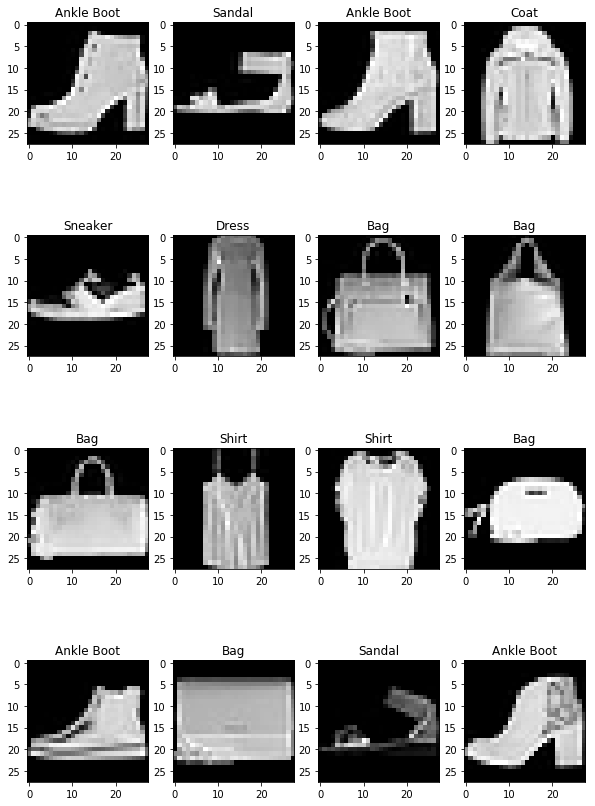

In [184]:

# Let's label the images since it is not labelled yet:

labels = { 0 : 'T-shirt',
           1 : 'Trouser',
           2 : 'Pullover',
           3 : 'Dress',
           4 : 'Coat',
           5 : 'Sandal',
           6 : 'Shirt',
           7 : 'Sneaker',
           8 : 'Bag',
           9 : 'Ankle Boot' 
         }
    


# plot to see image to get some idea:

import random

nrows  =  4
ncolns =  4

fig = plt.figure(figsize=(10,15))

for i in range(nrows * ncolns):
 
  plt.subplot(4,4,i+1)
  random_number = random.randint(0,train_x.shape[0] + 1)
  plt.imshow(train_x[random_number], cmap='gray')
  plt.title(labels[train_y[random_number]])

Text(0, 0.5, 'Number of images')

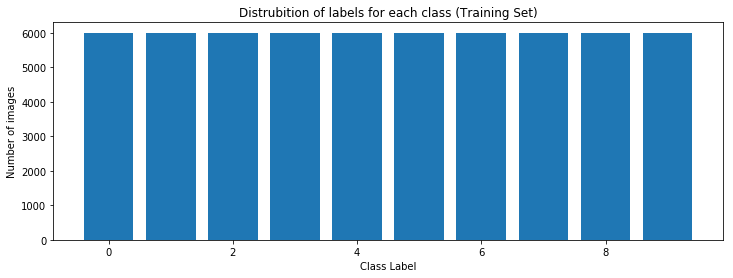

In [185]:
# Check the datasets for skewness in training data

training_labels = []

number_of_classes = max(train_y) + 1  # there is 0 labels
  
for index in range(number_of_classes ):
    
    selected_labels  = train_x[train_y == index]
    number_of_labels = len(selected_labels)
    training_labels.append(number_of_labels)
    
plt.figure(figsize=(12,4))
plt.bar(range(0,number_of_classes),training_labels)
plt.title('Distrubition of labels for each class (Training Set)')
plt.xlabel("Class Label")
plt.ylabel("Number of images")



Text(0, 0.5, 'Number of images')

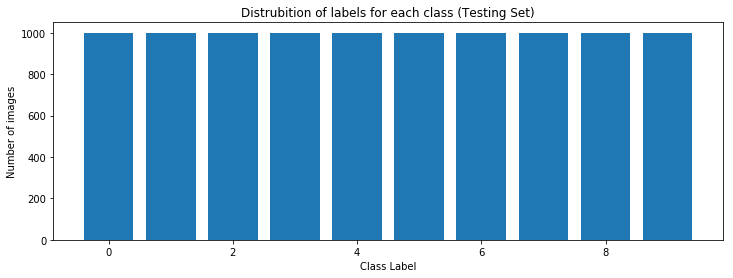

In [186]:
testing_labels  = []
for index in range(number_of_classes):
    
    selected_labels  = test_x[test_y == index]
    number_of_labels = len(selected_labels)
    testing_labels.append(number_of_labels)
    
plt.figure(figsize=(12,4))
plt.bar(range(0,number_of_classes),testing_labels)
plt.title('Distrubition of labels for each class (Testing Set)')
plt.xlabel("Class Label")
plt.ylabel("Number of images")

# Data distribution in this dataset is perfectly distributed !

In [0]:
# Need reshape inputs, keras CNN needs channel depth:

train_x =  train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

#normalization:

train_x = train_x / 255.0
test_x  = test_x  / 255.0
  
# Need reshape outputs to one-hot encoding:

from keras.utils import to_categorical


train_y = to_categorical(train_y, number_of_classes)
test_y  = to_categorical(test_y, number_of_classes)


In [188]:
# Check shape again just in case:

print("Shape of Training X: " + str(train_x.shape))
print("Shape of Training Y: " + str(train_y.shape))
print("Shape of Testing X: " + str(test_x.shape))
print("Shape of Testing Y: " + str(test_y.shape))


Shape of Training X: (60000, 28, 28, 1)
Shape of Training Y: (60000, 10)
Shape of Testing X: (10000, 28, 28, 1)
Shape of Testing Y: (10000, 10)


In [189]:
# Fun Part: Defining CNN Model:

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout ,  BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

def timcnn_model():
  
  model = Sequential()
  
  model.add(Conv2D(128,  (3,3) , input_shape = ( 28,28,1) , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128,  (3,3), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(4, 4)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(256, (3,3), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  

  model.add(Dense(number_of_classes, activation='softmax'))
  
  model.compile(Adam(lr = 0.00095), loss='categorical_crossentropy', metrics=['accuracy'])
  

  
  return model

tim_model = timcnn_model()
tim_model.summary()
  
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_46 (Batc (None, 26, 26, 128)       512       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_47 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 256)         295168    
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/160
48000/48000 [==============================] - 16s 343us/step - loss: 0.8217 - acc: 0.7141 - val_loss: 0.4246 - val_acc: 0.8412
Epoch 2/160
48000/48000 [==============================] - 12s 253us/step - loss: 0.4903 - acc: 0.8198 - val_loss: 0.3564 - val_acc: 0.8695
Epoch 3/160
48000/48000 [==============================] - 12s 255us/step - loss: 0.4108 - acc: 0.8496 - val_loss: 0.3070 - val_acc: 0.8840
Epoch 4/160
48000/48000 [==============================] - 12s 253us/step - loss: 0.3708 - acc: 0.8648 - val_loss: 0.2837 - val_acc: 0.8953
Epoch 5/160
48000/48000 [==============================] - 12s 252us/step - loss: 0.3382 - acc: 0.8756 - val_loss: 0.2818 - val_acc: 0.8968
Epoch 6/160
48000/48000 [==============================] - 12s 251us/step - loss: 0.3123 - acc: 0.8854 - val_loss: 0.2662 - val_acc: 0.8990
Epoch 7/160
48000/48000 [==============================] - 12s 251us/step - loss: 0.3002 - acc: 0.8903 - val_l

Text(0, 0.5, 'Accuracy')

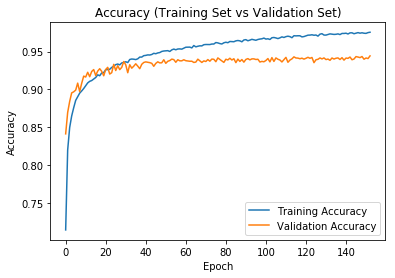

In [190]:
### Training the Model


import tensorflow as tf

# Implement callback function to stop training once validation accuracy reaches a threshold

accuracy_threshold = 0.944

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_acc') >= accuracy_threshold):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(accuracy_threshold*100))
			self.model.stop_training = True

callbacks = myCallback()

# Train the model

information  =  tim_model.fit(train_x,train_y, epochs = 160 , callbacks = [callbacks], validation_split = 0.2 , batch_size = 128 , verbose = 1, shuffle = 1)


# Plot the  accuracy graphs for tuning:


plt.plot(information.history['acc'])
plt.plot(information.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy (Training Set vs Validation Set)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [191]:
### Checking with test datasets:

score = tim_model.evaluate(test_x, test_y, verbose=0)
print('Testing Accuracy:' + str(score[1] * 100.0) + "%")

Testing Accuracy:94.07%


Text(0, 0.5, 'Loss')

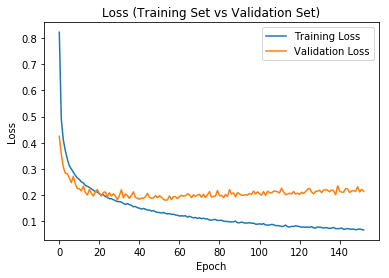

In [192]:
# Plot the  accuracy graphs for tuning:


plt.plot(information.history['loss'])
plt.plot(information.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.title('Loss (Training Set vs Validation Set)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [193]:
# Finding misclassified data (helps me visualise):

import numpy as np

predicted = tim_model.predict(test_x)  

wrong_labels = []

for i in range(test_x.shape[0]):
  
  if np.argmax(test_y[i]) != np.argmax(predicted[i]):
    
    wrong_labels.append(i)
    
amt_wrong_labels = len(wrong_labels)

#Checking testing accuracy: It must be the same to ensure that everything is correct for my mislabelling codes:

test_acc = (test_x.shape[0] - amt_wrong_labels) / test_x.shape[0]
print('Testing Accuracy:' + str(test_acc * 100.0) + "%")


Testing Accuracy:94.07%


Shape of misclassified images = (593, 28, 28, 1)


Text(0, 0.5, 'Number of images that are misclassified')

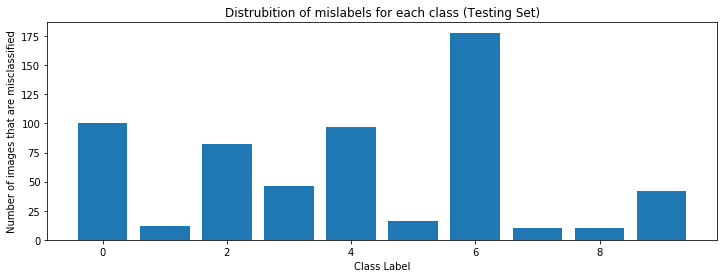

In [194]:
# Getting the misclassfied images and plotting

misclassified_images  = test_x[wrong_labels]
print('Shape of misclassified images = '+ str(misclassified_images.shape))

# I want to know which type of picture is getting misclassified the most:

mislabels = np.argmax(test_y[wrong_labels] , axis = 1)  #getting a list of mislabels with the labelled number


testing_mislabels =  []

for index in range(number_of_classes):
  
     number_of_mislabels  = sum(mislabels == index)
     testing_mislabels.append(number_of_mislabels)
      
# Now I can plot the bar chart to study what is getting mislabelled:

plt.figure(figsize=(12,4))
plt.bar(range(0,number_of_classes),testing_mislabels)
plt.title('Distrubition of mislabels for each class (Testing Set)')
plt.xlabel("Class Label")
plt.ylabel("Number of images that are misclassified")






In [0]:
# Label 6 and 0 seems to be misclassified the most followed by 2 and 4.

# I had the intuition that this would had been the case. Label 0 (Shirt) and Label 6 (T-Shirt) looks too alike
# Especially since we are using 28x28, it is not surprising that the AI model cannot differentiate between the two very well.
# I believe even humans will have some problems with it.

# As for Label 2 and 4, I think it is the same problem. Pullover and Coats are very alike for some variation of it.

# From these findings, I am super curious on what's the human error performance for FASHION_MNIST

# An idea that I think might work is to increase the about of data for Labels 6 and 0 first through data augmentation.

In [196]:
### Extra, let's try it on MNIST dataset too

# MNIST DATASET: 

from keras.datasets import mnist

(train_x2, train_y2), (test_x2, test_y2) = mnist.load_data()



print("Shape of Training X: " + str(train_x2.shape))
print("Shape of Training Y: " + str(train_y2.shape))
print("Shape of Testing X: " + str(test_x2.shape))
print("Shape of Testing Y: " + str(test_y2.shape))

Shape of Training X: (60000, 28, 28)
Shape of Training Y: (60000,)
Shape of Testing X: (10000, 28, 28)
Shape of Testing Y: (10000,)


In [0]:
# Need reshape inputs, keras CNN needs channel depth:

train_x2 =  train_x2.reshape(train_x2.shape[0],train_x2.shape[1],train_x2.shape[2],1)
test_x2 = test_x2.reshape(test_x2.shape[0],test_x2.shape[1],test_x2.shape[2],1)

# normalization:

train_x2 = train_x2 / 255.0
test_x2 = test_x2  / 255.0
  
# Need reshape outputs to one-hot encoding:

from keras.utils import to_categorical


train_y2 = to_categorical(train_y2, number_of_classes)
test_y2  = to_categorical(test_y2, number_of_classes)

In [198]:


information2  =  tim_model.fit(train_x2,train_y2, epochs = 100 , validation_split = 0.2 , batch_size = 128 , verbose = 1, shuffle = 1)


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 12s 255us/step - loss: 0.6166 - acc: 0.8582 - val_loss: 0.0776 - val_acc: 0.9762
Epoch 2/100
48000/48000 [==============================] - 12s 253us/step - loss: 0.1616 - acc: 0.9516 - val_loss: 0.0514 - val_acc: 0.9841
Epoch 3/100
48000/48000 [==============================] - 12s 252us/step - loss: 0.1164 - acc: 0.9646 - val_loss: 0.0414 - val_acc: 0.9875
Epoch 4/100
48000/48000 [==============================] - 12s 252us/step - loss: 0.0937 - acc: 0.9698 - val_loss: 0.0371 - val_acc: 0.9889
Epoch 5/100
48000/48000 [==============================] - 12s 252us/step - loss: 0.0818 - acc: 0.9749 - val_loss: 0.0358 - val_acc: 0.9888
Epoch 6/100
48000/48000 [==============================] - 12s 252us/step - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0309 - val_acc: 0.9900
Epoch 7/100
48000/48000 [==============================] - 12s 251us/step - loss: 0.0636 - acc: 0.9800 - val_l

In [199]:
score2 = tim_model.evaluate(test_x2, test_y2, verbose=0)
print('Testing Accuracy for MNIST:' + str(score2[1] * 100.0) + "%")

Testing Accuracy for MNIST:99.48%
